# **Data Analysis of IMDB Movies**:

## Introduction
> In this notebook I have analyzed IMDB database and decided to look at the profitability of a movie given its genre, budget, and average rating. I then use the profit column to rank movies, create visualizations, and present various categories of movies based on their genre, directors, and cast.


# Research Questions
1. What is the most profitable comedy, action, drama, and horror movie?
2. Who are the top 3 highest rated movie stars in this dataset?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
%matplotlib inline

## Exploring the data

In [3]:
df = pd.read_csv('tmdb-movies.csv')

In [4]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,101199955.5,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015,183999919.0,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015,174799923.1,1.385749e+09


In [5]:
df.count()

id                      10866
imdb_id                 10856
popularity              10866
budget                  10866
revenue                 10866
original_title          10866
cast                    10790
homepage                 2936
director                10822
tagline                  8042
keywords                 9373
overview                10862
runtime                 10866
genres                  10843
production_companies     9836
release_date            10866
vote_count              10866
vote_average            10866
release_year            10866
budget_adj              10866
revenue_adj             10866
dtype: int64

In [6]:
# For my analysis only a few of these columns is relevant, 
# so I will drop off any columns I don't need. For my budget and revenue analysis I 
# used budget_adj and revenue_adj as a way to standardize each measure in terms of 2010 dollars,
# making comparisons more accurate by accounting for inflation.

In [7]:
df.drop(columns=['id', 'imdb_id','popularity','budget', 'revenue','homepage','tagline','keywords','release_date',
                 'overview','runtime','production_companies','release_date','vote_count'], inplace=True)
df.count()

original_title    10866
cast              10790
director          10822
genres            10843
vote_average      10866
release_year      10866
budget_adj        10866
revenue_adj       10866
dtype: int64

# Creating a profit column

In [8]:
# First I have to remove any movies with zero or missing 
# values for a budget

In [9]:
df.query('budget_adj == 0').count()

original_title    5696
cast              5631
director          5656
genres            5674
vote_average      5696
release_year      5696
budget_adj        5696
revenue_adj       5696
dtype: int64

In [10]:
# Before removing nearly half of all my data, I make a copy to save for
# additional analysis later

In [11]:
original_df = df.copy()

In [12]:
original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 8 columns):
original_title    10866 non-null object
cast              10790 non-null object
director          10822 non-null object
genres            10843 non-null object
vote_average      10866 non-null float64
release_year      10866 non-null int64
budget_adj        10866 non-null float64
revenue_adj       10866 non-null float64
dtypes: float64(3), int64(1), object(4)
memory usage: 679.2+ KB


In [13]:
df = df.query('budget_adj != 0')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5170 entries, 0 to 10865
Data columns (total 8 columns):
original_title    5170 non-null object
cast              5159 non-null object
director          5166 non-null object
genres            5169 non-null object
vote_average      5170 non-null float64
release_year      5170 non-null int64
budget_adj        5170 non-null float64
revenue_adj       5170 non-null float64
dtypes: float64(3), int64(1), object(4)
memory usage: 363.5+ KB


In [15]:
# Next I will need to check my Revenue column for any missing values

In [16]:
df['revenue_adj'].min()

0.0

In [17]:
df.query('revenue_adj == 0' )

,original_title,cast,director,genres,vote_average,release_year,budget_adj,revenue_adj
48,Wild Card,Jason Statham|Michael Angarano|Milo Ventimigli...,Simon West,Thriller|Crime|Drama,5.3,2015,2.759999e+07,0.0
67,Survivor,Pierce Brosnan|Milla Jovovich|Dylan McDermott|...,James McTeigue,Crime|Thriller|Action,5.4,2015,1.839999e+07,0.0
93,Vice,Ambyr Childers|Thomas Jane|Bryan Greenberg|Bru...,Brian A Miller,Thriller|Science Fiction|Action|Adventure,4.1,2015,9.199996e+06,0.0
133,Louder Than Bombs,Gabriel Byrne|Isabelle Huppert|Jesse Eisenberg...,Joachim Trier,Drama,6.3,2015,1.012000e+07,0.0
145,Bone Tomahawk,Kurt Russell|Richard Jenkins|Matthew Fox|Lili ...,S. Craig Zahler,Horror|Western|Adventure|Drama,6.3,2015,1.655999e+06,0.0
149,Momentum,Olga Kurylenko|Morgan Freeman|James Purefoy|Je...,Stephen S. Campanelli,Thriller|Action,5.8,2015,1.839999e+07,0.0
154,Il racconto dei racconti,Salma Hayek|Vincent Cassel|John C. Reilly|Toby...,Matteo Garrone,Romance|Fantasy|Horror,5.7,2015,1.104000e+07,0.0
156,Queen of the Desert,Nicole Kidman|James Franco|Robert Pattinson|Da...,Werner Herzog,Drama|History,6.0,2015,1.379999e+07,0.0
159,Kung Fury,David Sandberg|Jorma Taccone|Leopold Nilsson|A...,David Sandberg,Action|Comedy|Science Fiction|Fantasy,7.7,2015,5.796172e+05,0.0
165,The Ridiculous 6,Adam Sandler|Taylor Lautner|Steve Buscemi|Terr...,Frank Coraci,Comedy|Western,4.8,2015,5.519998e+07,0.0


In [18]:
df.query('revenue_adj !=0').count()

original_title    3855
cast              3851
director          3854
genres            3855
vote_average      3855
release_year      3855
budget_adj        3855
revenue_adj       3855
dtype: int64

In [19]:
df = df.query('revenue_adj != 0')

In [20]:
df.sort_values(by='budget_adj', ascending=True).head()

,original_title,cast,director,genres,vote_average,release_year,budget_adj,revenue_adj
3581,"Love, Wedding, Marriage",Mandy Moore|Kellan Lutz|Jessica Szohr|Autumn F...,Dermot Mulroney,Comedy|Romance,5.3,2011,0.969398,1335.830503
2618,Lost & Found,David Spade|Sophie Marceau|Ever Carradine|Step...,Jeff Pollack,Comedy|Romance,4.8,1999,1.309053,130.905285
2398,Boy,James Rolleston|Craig Hall|Taika Waititi|Te Ah...,Taika Waititi,Drama|Comedy,7.3,2010,3.000000,43.000000
8944,Death Wish 2,Charles Bronson|Jill Ireland|Vincent Gardenia|...,Michael Winner,Action|Crime|Thriller,5.6,1982,4.519285,36.154278
10050,Tales from the Darkside: The Movie,Rae Dawn Chong|Christian Slater|Deborah Harry|...,John Harrison,Fantasy|Horror|Comedy,5.8,1990,5.006696,26.702377


In [21]:
# Even after removing all the rows in budget and revenue with values of 
# zero I found that I still have a problem in my data.  Some budgets and
# revenues are much lower than I know intuitively to be possible.

In [22]:
# My best solution to work around this problem was to set a floor value to 
# begin my analysis at for budget and revenue that may be possible. My choice for 
# this value was $11,000.

# I chose this number after googling low-budget films and found that
# a few successful low-budget films had been made at around this amount.

In [23]:
df.query('budget_adj <= 11000').count()

original_title    25
cast              24
director          25
genres            25
vote_average      25
release_year      25
budget_adj        25
revenue_adj       25
dtype: int64

In [24]:
df.query('revenue_adj <= 11000').count()

original_title    49
cast              48
director          49
genres            49
vote_average      49
release_year      49
budget_adj        49
revenue_adj       49
dtype: int64

In [25]:
# After filtering by $11,000, I found that I would only be dropping 74 movies
# so I continued with my dataframe, dropping these movies permanently

In [26]:
df = df.query('budget_adj >= 11000')
df = df.query('revenue_adj >= 11000')

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3801 entries, 0 to 10848
Data columns (total 8 columns):
original_title    3801 non-null object
cast              3798 non-null object
director          3800 non-null object
genres            3801 non-null object
vote_average      3801 non-null float64
release_year      3801 non-null int64
budget_adj        3801 non-null float64
revenue_adj       3801 non-null float64
dtypes: float64(3), int64(1), object(4)
memory usage: 267.3+ KB


In [28]:
# After cleaning up my budget and revenue, to get a profit column
# I just subtracted the budget from the revenue for every movie and
# placed this under the variable profit.


In [29]:
profit = df['revenue_adj'] - df['budget_adj']

In [30]:
# After that I added this column back in to my dataframe

In [31]:
df['profit'] = profit

In [32]:
# To make sure I have a profit value for every movie I run
# test to make sure the length of the profit column is equal
# my count of original movies

In [33]:
len(df.profit) == df.original_title.count()

True

In [34]:
# As a second check, I look at the most profitable movie
# and the least profitable movie.

In [35]:
df[df['profit'] == df.profit.max()]

,original_title,cast,director,genres,vote_average,release_year,budget_adj,revenue_adj,profit
1329,Star Wars,Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...,George Lucas,Adventure|Action|Science Fiction,7.9,1977,39575591.36,2.789712e+09,2.750137e+09


In [36]:
df[df['profit'] == df.profit.min()]

,original_title,cast,director,genres,vote_average,release_year,budget_adj,revenue_adj,profit
2244,The Warrior's Way,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,Sngmoo Lee,Adventure|Fantasy|Action|Western|Thriller,6.4,2010,425000000.0,11087569.0,-413912431.0


In [37]:
# These values turned up good values so now I am ready to continue 
# on to make next steps of seperating out my movies by genre
# and creating visualizations for my data.

# Seperating the data by movie genre

In [38]:
# To seperate my movies by genre, first I have to find the unique
# genres withiin my data

In [39]:
df.genres.unique()

array(['Action|Adventure|Science Fiction|Thriller',
       'Adventure|Science Fiction|Thriller',
       'Action|Adventure|Science Fiction|Fantasy', ...,
       'Action|Drama|Horror|Thriller', 'Adventure|Animation|Drama',
       'Action|Adventure|Drama|War|Romance'], dtype=object)

In [40]:
df.genres.value_counts()

Drama                                             243
Comedy                                            232
Drama|Romance                                     104
Comedy|Romance                                    101
Comedy|Drama|Romance                               90
Comedy|Drama                                       86
Horror|Thriller                                    78
Horror                                             57
Drama|Thriller                                     47
Action|Thriller                                    39
Crime|Drama|Thriller                               37
Drama|Comedy                                       35
Comedy|Family                                      32
Action|Crime|Thriller                              30
Drama|Crime                                        27
Drama|History                                      27
Crime|Drama                                        26
Action|Crime|Drama|Thriller                        25
Drama|Comedy|Romance        

In [41]:
# For the sake of this analysis I chose to to use the genres
# comedy, drama, action, horror, thrillers, animation, and crime.

# To seperate them by their genres, used a string contains method

In [42]:
comedies_df = df[df['genres'].str.contains('Comedy', na=False)]

In [43]:
drama_df = df[df['genres'].str.contains('Drama', na=False)]

In [44]:
action_df = df[df['genres'].str.contains('Action', na=False)]

In [45]:
horror_df = df[df['genres'].str.contains('Horror', na=False)]

In [46]:
thriller_df = df[df['genres'].str.contains('Thriller', na=False)]

In [47]:
animation_df = df[df['genres'].str.contains('Animation', na=False)]

In [48]:
crime_df = df[df['genres'].str.contains('Crime', na=False)]

# Visualizing Profitability 
# by Genres,  Budget, and Ratings
>For my visualizations I wanted to be able to look at budget, ratings,
> profit, and genre all in one complete visualization and I found a scatterplot
> combined with a colorbar worked quite effectively.  On the colorbar range I incorporated
> ticks that simplified the profit analysis, evaluating on a scale between a "Net Loss" and " Highly Profitable".
> To not create any misrepresentations of differing variables, I scaled the Y axis to match the colorbar axis in US dollar values. Underneath every visualization, I also included the top three most profitable movies in each genre.

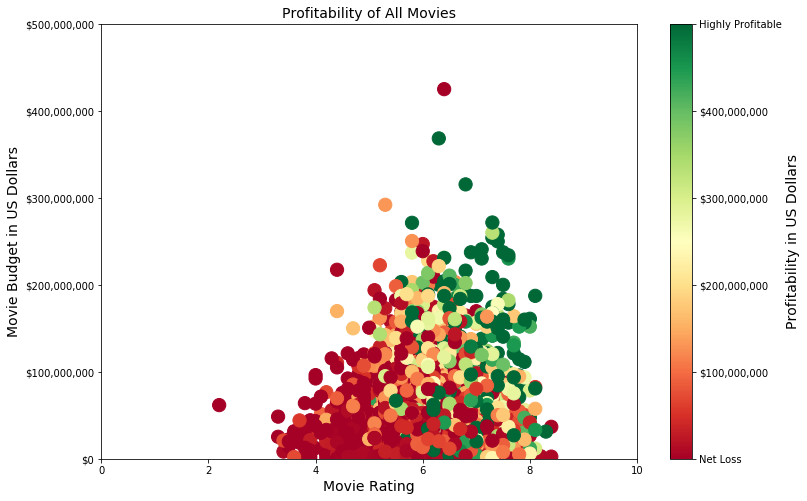

In [49]:
sizes = 175 


plt.figure(figsize=(12, 8))
plt.xlim(0,10)
plt.ylim(0,5e8)
tick_pos=[0,1e8,2e8,3e8,4e8,5e8]
tick_lab=['$0','$100,000,000','$200,000,000','$300,000,000','$400,000,000','$500,000,000']
cbar_lab=['Net Loss','$100,000,000','$200,000,000','$300,000,000','$400,000,000','Highly Profitable']
plt.yticks(ticks=tick_pos, 
           labels=tick_lab)
sctr = plt.scatter(x=df['vote_average'],y=df['budget_adj'],c=df['profit'], 
                 s=sizes, alpha=1,
            cmap='RdYlGn')
plt.ylabel('Movie Budget in US Dollars',fontsize=14)
plt.xlabel('Movie Rating',fontsize=14)
sctr.set_clim(vmin=0, vmax=500000000)
cbar = plt.colorbar(sctr, format='$%d')
cbar.set_ticks(tick_pos)
cbar.set_ticklabels(cbar_lab)
cbar.set_label('Profitability in US Dollars',fontsize=14)
plt.title('Profitability of All Movies',fontsize=14)
plt.grid(False)


In [50]:
df.sort_values(by='profit', ascending=False).head(3)

,original_title,cast,director,genres,vote_average,release_year,budget_adj,revenue_adj,profit
1329,Star Wars,Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...,George Lucas,Adventure|Action|Science Fiction,7.9,1977,3.957559e+07,2.789712e+09,2.750137e+09
1386,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,Action|Adventure|Fantasy|Science Fiction,7.1,2009,2.408869e+08,2.827124e+09,2.586237e+09
5231,Titanic,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,James Cameron,Drama|Romance|Thriller,7.3,1997,2.716921e+08,2.506406e+09,2.234714e+09


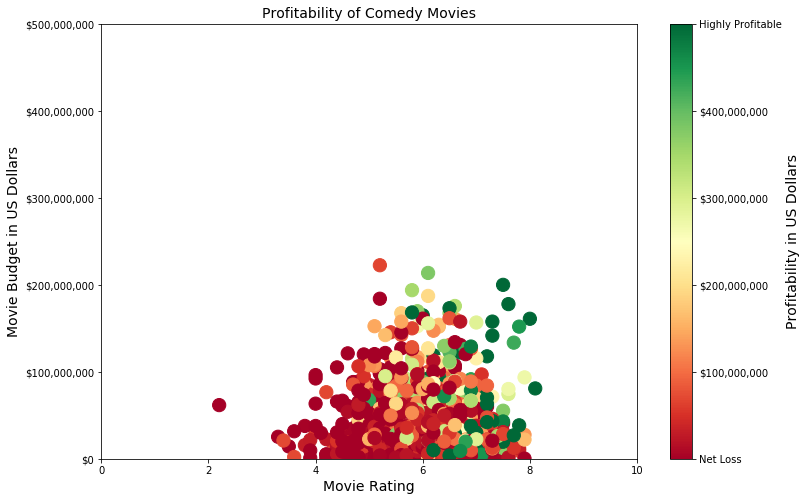

In [51]:
sizes = 175 

plt.figure(figsize=(12, 8))
plt.xlim(0,10)
plt.ylim(0,5e8)
tick_pos=[0,1e8,2e8,3e8,4e8,5e8]
tick_lab=['$0','$100,000,000','$200,000,000','$300,000,000','$400,000,000','$500,000,000']
cbar_lab=['Net Loss','$100,000,000','$200,000,000','$300,000,000','$400,000,000','Highly Profitable']
plt.yticks(ticks=tick_pos, 
           labels=tick_lab)
plt.ylabel('Movie Budget in US Dollars',fontsize=14)
plt.xlabel('Movie Rating',fontsize=14)
sctr_com = plt.scatter(x=comedies_df['vote_average'],y=comedies_df['budget_adj'],
                c=comedies_df['profit'], s=sizes, alpha=1, cmap = 'RdYlGn')
sctr_com.set_clim(vmin=0, vmax=5e8)
cbar_com= plt.colorbar(sctr_com, format='$%d')
cbar_com.set_ticks(tick_pos)
cbar_com.set_ticklabels(cbar_lab)
cbar_com.set_label('Profitability in US Dollars',fontsize=14)
plt.title('Profitability of Comedy Movies',fontsize=14)
plt.grid(False)

In [132]:
comedies_df.sort_values(by='profit', ascending=False).head(3)

,original_title,cast,director,genres,vote_average,release_year,budget_adj,revenue_adj,profit
10110,One Hundred and One Dalmatians,Rod Taylor|J. Pat O'Malley|Betty Lou Gerson|Ma...,Clyde Geronimi|Hamilton Luske|Wolfgang Reitherman,Adventure|Animation|Comedy|Family,6.6,1961,29179444.83,1.574815e+09,1.545635e+09
8,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,Kyle Balda|Pierre Coffin,Family|Animation|Adventure|Comedy,6.5,2015,68079970.04,1.064192e+09,9.961120e+08
4179,Forrest Gump,Tom Hanks|Robin Wright|Gary Sinise|Mykelti Wil...,Robert Zemeckis,Comedy|Drama|Romance,8.1,1994,80911135.89,9.973333e+08,9.164222e+08


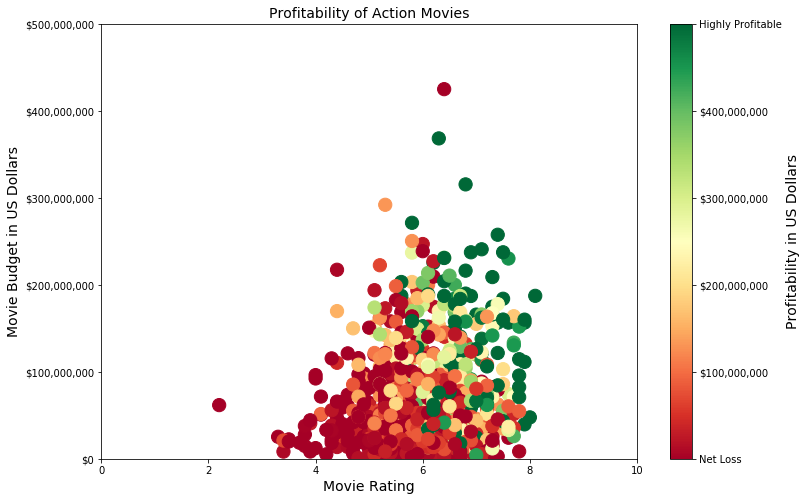

In [53]:
sizes = 175 

plt.figure(figsize=(12, 8))
plt.xlim(0,10)
plt.ylim(0,5e8)
tick_pos=[0,1e8,2e8,3e8,4e8,5e8]
tick_lab=['$0','$100,000,000','$200,000,000','$300,000,000','$400,000,000','$500,000,000']
cbar_lab=['Net Loss','$100,000,000','$200,000,000','$300,000,000','$400,000,000','Highly Profitable']
plt.yticks(ticks=tick_pos, 
           labels=tick_lab)
plt.ylabel('Movie Budget in US Dollars',fontsize=14)
plt.xlabel('Movie Rating',fontsize=14)
sctr_act = plt.scatter(x=action_df['vote_average'],y=action_df['budget_adj'], 
                       c=action_df['profit'], s=sizes, alpha=1, cmap = 'RdYlGn')
sctr_act.set_clim(vmin=0, vmax=500000000)
cbar_act= plt.colorbar(sctr_act, format='$%d')
cbar_act.set_ticks(tick_pos)
cbar_act.set_ticklabels(cbar_lab)
cbar_act.set_label('Profitability in US Dollars',fontsize=14)
plt.title('Profitability of Action Movies',fontsize=14)
plt.grid(False)

In [54]:
action_df.sort_values(by='profit', ascending=False).head(3)

,original_title,cast,director,genres,vote_average,release_year,budget_adj,revenue_adj,profit
1329,Star Wars,Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...,George Lucas,Adventure|Action|Science Fiction,7.9,1977,3.957559e+07,2.789712e+09,2.750137e+09
1386,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,Action|Adventure|Fantasy|Science Fiction,7.1,2009,2.408869e+08,2.827124e+09,2.586237e+09
3,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,7.5,2015,1.839999e+08,1.902723e+09,1.718723e+09


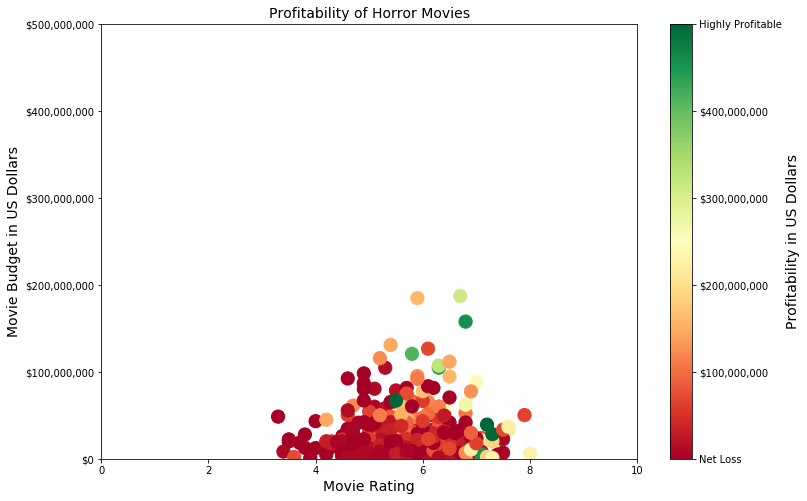

In [55]:
sizes = 175 

plt.figure(figsize=(12, 8))
plt.xlim(0,10)
plt.ylim(0,5e8)
tick_pos=[0,1e8,2e8,3e8,4e8,5e8]
tick_lab=['$0','$100,000,000','$200,000,000','$300,000,000','$400,000,000','$500,000,000']
cbar_lab=['Net Loss','$100,000,000','$200,000,000','$300,000,000','$400,000,000','Highly Profitable']
plt.yticks(ticks=tick_pos, 
           labels=tick_lab)
plt.ylabel('Movie Budget in US Dollars',fontsize=14)
plt.xlabel('Movie Rating',fontsize=14)
sctr_hor = plt.scatter(x=horror_df['vote_average'],y=horror_df['budget_adj'],
                c=horror_df['profit'], s=sizes, alpha=1, cmap = 'RdYlGn')
sctr_hor.set_clim(vmin=0, vmax=500000000)
cbar_hor = plt.colorbar(sctr_hor, format='$%d')
cbar_hor.set_ticks(tick_pos)
cbar_hor.set_ticklabels(cbar_lab)
cbar_hor.set_label('Profitability in US Dollars',fontsize=14)
plt.title('Profitability of Horror Movies',fontsize=14)
plt.grid(False)

In [56]:
horror_df.sort_values(by='profit', ascending=False).head(3)

,original_title,cast,director,genres,vote_average,release_year,budget_adj,revenue_adj,profit
10594,The Exorcist,Linda Blair|Max von Sydow|Ellen Burstyn|Jason ...,William Friedkin,Drama|Horror|Thriller,7.2,1973,39289276.63,2.167325e+09,2.128036e+09
9806,Jaws,Roy Scheider|Robert Shaw|Richard Dreyfuss|Lorr...,Steven Spielberg,Horror|Thriller|Adventure,7.3,1975,28362748.20,1.907006e+09,1.878643e+09
9613,Fatal Attraction,Michael Douglas|Glenn Close|Anne Archer|Ellen ...,Adrian Lyne,Horror|Drama|Romance|Thriller,6.4,1987,26867126.13,6.143853e+08,5.875182e+08


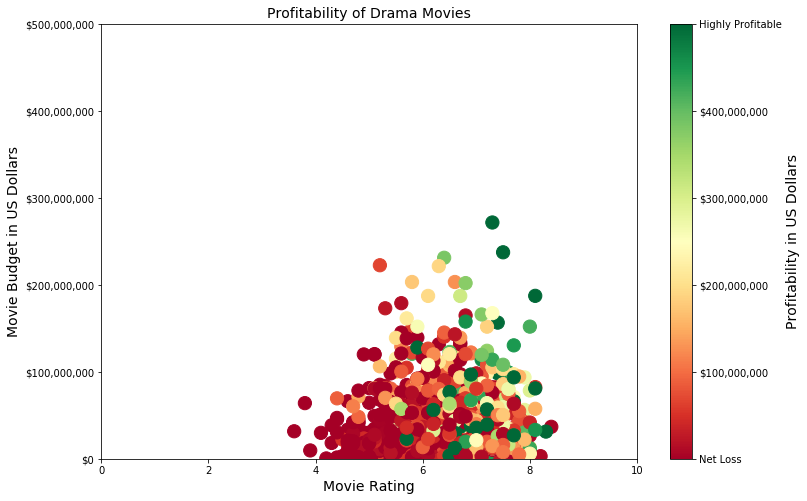

In [57]:
sizes = 175

plt.figure(figsize=(12, 8))
plt.xlim(0,10)
plt.ylim(0,5e8)
tick_pos=[0,1e8,2e8,3e8,4e8,5e8]
tick_lab=['$0','$100,000,000','$200,000,000','$300,000,000','$400,000,000','$500,000,000']
cbar_lab=['Net Loss','$100,000,000','$200,000,000','$300,000,000','$400,000,000','Highly Profitable']
plt.yticks(ticks=tick_pos, 
           labels=tick_lab)
plt.ylabel('Movie Budget in US Dollars',fontsize=14)
plt.xlabel('Movie Rating',fontsize=14)
sctr_dra = plt.scatter(x=drama_df['vote_average'],y=drama_df['budget_adj'],
                c=drama_df['profit'], s=sizes, alpha=1, cmap = 'RdYlGn')
cbar_dra = plt.colorbar(sctr_dra, format='$%d')
sctr_dra.set_clim(vmin=0, vmax=500000000)
cbar_dra.set_ticks(tick_pos)
cbar_dra.set_ticklabels(cbar_lab)
cbar_dra.set_label('Profitability in US Dollars',fontsize=14)
plt.title('Profitability of Drama Movies',fontsize=14)
plt.grid(False)

In [58]:
drama_df.sort_values(by='profit', ascending=False).head(3)

,original_title,cast,director,genres,vote_average,release_year,budget_adj,revenue_adj,profit
5231,Titanic,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,James Cameron,Drama|Romance|Thriller,7.3,1997,2.716921e+08,2.506406e+09,2.234714e+09
10594,The Exorcist,Linda Blair|Max von Sydow|Ellen Burstyn|Jason ...,William Friedkin,Drama|Horror|Thriller,7.2,1973,3.928928e+07,2.167325e+09,2.128036e+09
8094,The Net,Sandra Bullock|Jeremy Northam|Dennis Miller|We...,Irwin Winkler,Crime|Drama|Mystery|Thriller|Action,5.6,1995,3.148127e+07,1.583050e+09,1.551568e+09


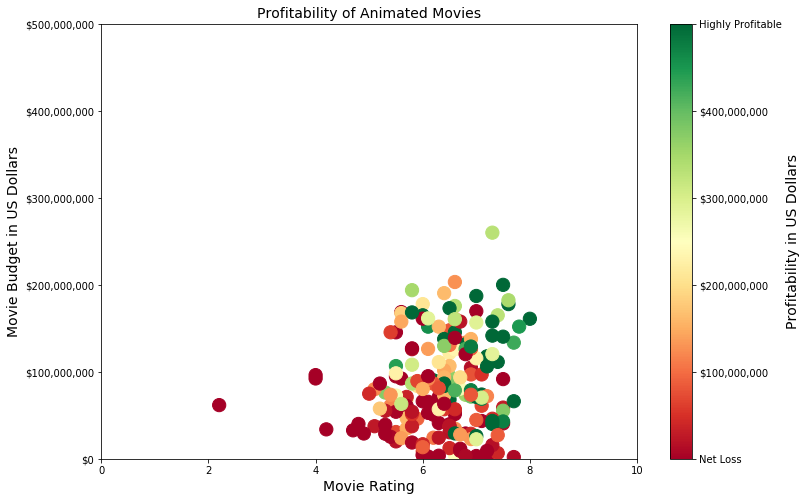

In [59]:
sizes = 175

plt.figure(figsize=(12, 8))
plt.xlim(0,10)
plt.ylim(0,5e8)
tick_pos=[0,1e8,2e8,3e8,4e8,5e8]
tick_lab=['$0','$100,000,000','$200,000,000','$300,000,000','$400,000,000','$500,000,000']
cbar_lab=['Net Loss','$100,000,000','$200,000,000','$300,000,000','$400,000,000','Highly Profitable']
plt.yticks(ticks=tick_pos, 
           labels=tick_lab)
plt.ylabel('Movie Budget in US Dollars',fontsize=14)
plt.xlabel('Movie Rating',fontsize=14)
sctr_ani = plt.scatter(x=animation_df['vote_average'],y=animation_df['budget_adj'],
                c=animation_df['profit'], s=sizes, alpha=1, cmap = 'RdYlGn')
cbar_ani = plt.colorbar(sctr_ani, format='$%d')
sctr_ani.set_clim(vmin=0, vmax=500000000)
cbar_ani.set_ticks(tick_pos)
cbar_ani.set_ticklabels(cbar_lab)
cbar_ani.set_label('Profitability in US Dollars',fontsize=14)
plt.title('Profitability of Animated Movies',fontsize=14)
plt.grid(False)

In [60]:
animation_df.sort_values(by='profit', ascending=False).head(3)

,original_title,cast,director,genres,vote_average,release_year,budget_adj,revenue_adj,profit
10110,One Hundred and One Dalmatians,Rod Taylor|J. Pat O'Malley|Betty Lou Gerson|Ma...,Clyde Geronimi|Hamilton Luske|Wolfgang Reitherman,Adventure|Animation|Comedy|Family,6.6,1961,29179444.83,1.574815e+09,1.545635e+09
10398,The Jungle Book,Phil Harris|Sebastian Cabot|Louis Prima|George...,Wolfgang Reitherman,Family|Animation|Adventure,7.0,1967,26147054.96,1.345551e+09,1.319404e+09
4180,The Lion King,Jonathan Taylor Thomas|Matthew Broderick|James...,Roger Allers|Rob Minkoff,Family|Animation|Drama,7.7,1994,66200020.27,1.159592e+09,1.093392e+09


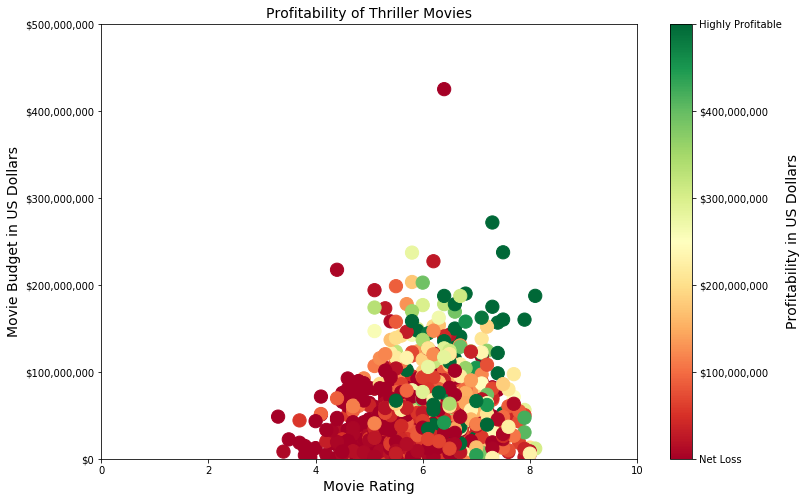

In [61]:
sizes = 175

plt.figure(figsize=(12, 8))
plt.xlim(0,10)
plt.ylim(0,5e8)
tick_pos=[0,1e8,2e8,3e8,4e8,5e8]
tick_lab=['$0','$100,000,000','$200,000,000','$300,000,000','$400,000,000','$500,000,000']
cbar_lab=['Net Loss','$100,000,000','$200,000,000','$300,000,000','$400,000,000','Highly Profitable']
plt.yticks(ticks=tick_pos, 
           labels=tick_lab)
plt.ylabel('Movie Budget in US Dollars',fontsize=14)
plt.xlabel('Movie Rating',fontsize=14)
sctr_thr = plt.scatter(x=thriller_df['vote_average'],y=thriller_df['budget_adj'],
                c=thriller_df['profit'], s=sizes, alpha=1, cmap = 'RdYlGn')
cbar_thr = plt.colorbar(sctr_thr, format='$%d')
sctr_thr.set_clim(vmin=0, vmax=500000000)
cbar_thr.set_ticks(tick_pos)
cbar_thr.set_ticklabels(cbar_lab)
cbar_thr.set_label('Profitability in US Dollars',fontsize=14)
plt.title('Profitability of Thriller Movies',fontsize=14)
plt.grid(False)

In [62]:
thriller_df.sort_values(by='profit', ascending=False).head(3)

,original_title,cast,director,genres,vote_average,release_year,budget_adj,revenue_adj,profit
5231,Titanic,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,James Cameron,Drama|Romance|Thriller,7.3,1997,2.716921e+08,2.506406e+09,2.234714e+09
10594,The Exorcist,Linda Blair|Max von Sydow|Ellen Burstyn|Jason ...,William Friedkin,Drama|Horror|Thriller,7.2,1973,3.928928e+07,2.167325e+09,2.128036e+09
9806,Jaws,Roy Scheider|Robert Shaw|Richard Dreyfuss|Lorr...,Steven Spielberg,Horror|Thriller|Adventure,7.3,1975,2.836275e+07,1.907006e+09,1.878643e+09


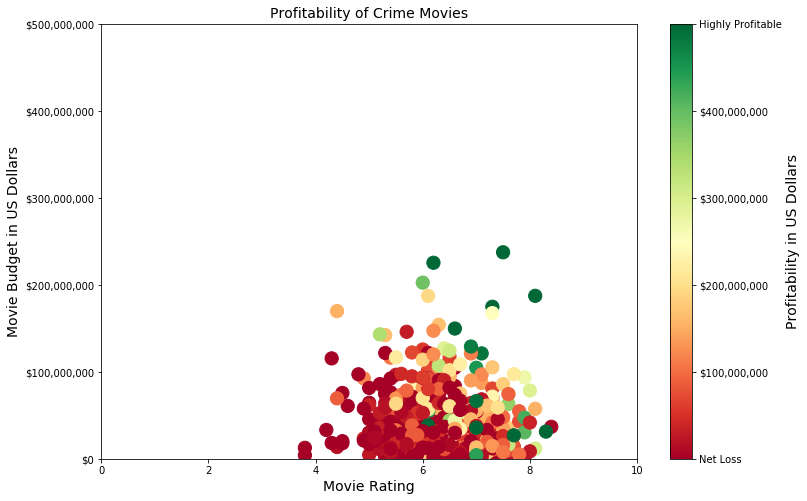

In [63]:
sizes = 175

plt.figure(figsize=(12, 8))
plt.xlim(0,10)
plt.ylim(0,5e8)
tick_pos=[0,1e8,2e8,3e8,4e8,5e8]
tick_lab=['$0','$100,000,000','$200,000,000','$300,000,000','$400,000,000','$500,000,000']
cbar_lab=['Net Loss','$100,000,000','$200,000,000','$300,000,000','$400,000,000','Highly Profitable']
plt.yticks(ticks=tick_pos, 
           labels=tick_lab)
plt.ylabel('Movie Budget in US Dollars',fontsize=14)
plt.xlabel('Movie Rating',fontsize=14)
sctr_cri = plt.scatter(x=crime_df['vote_average'],y=crime_df['budget_adj'],
                c=crime_df['profit'], s=sizes, alpha=1, cmap = 'RdYlGn')
cbar_cri = plt.colorbar(sctr_cri, format='$%d')
cbar_cri.set_ticks(tick_pos)
cbar_cri.set_ticklabels(cbar_lab)
cbar_cri.set_label('Profitability in US Dollars',fontsize=14)
sctr_cri.set_clim(vmin=0, vmax=5e8)
plt.title('Profitability of Crime Movies',fontsize=14)
plt.grid(False)

In [64]:
crime_df.sort_values(by='profit', ascending=False).head(3)

,original_title,cast,director,genres,vote_average,release_year,budget_adj,revenue_adj,profit
8094,The Net,Sandra Bullock|Jeremy Northam|Dennis Miller|We...,Irwin Winkler,Crime|Drama|Mystery|Thriller|Action,5.6,1995,3.148127e+07,1.583050e+09,1.551568e+09
7269,The Godfather,Marlon Brando|Al Pacino|James Caan|Richard S. ...,Francis Ford Coppola,Drama|Crime,8.3,1972,3.128737e+07,1.277914e+09,1.246626e+09
4,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Action|Crime|Thriller,7.3,2015,1.747999e+08,1.385749e+09,1.210949e+09


# Ranking Movie Directors
> Looking at the IMDB data in a different way, I wanted to see how movies could be ranked by director. 
> I looked at the variables of number of movies, ratings, and profit to show the top directors
> in the industry. This required the use of multiple groupby functions and using their outputs 
> to construct a new dataframe called dir_combo, which eventually would be renamed dir5_df after
> a conditional parameter of 5 or more movies was placed on my dataframe.

In [65]:
original_df.director.value_counts()

Woody Allen                                     45
Clint Eastwood                                  34
Martin Scorsese                                 29
Steven Spielberg                                29
Ridley Scott                                    23
Steven Soderbergh                               22
Ron Howard                                      22
Joel Schumacher                                 21
Brian De Palma                                  20
Barry Levinson                                  19
Wes Craven                                      19
Tim Burton                                      19
David Cronenberg                                18
Rob Reiner                                      18
Mike Nichols                                    18
John Carpenter                                  18
Oliver Stone                                    17
Sidney Lumet                                    17
Robert Zemeckis                                 17
Tyler Perry                    

In [66]:
dir_group = original_df.groupby('director').mean()[['vote_average']]

In [67]:
dir_group.sort_values(by='vote_average', ascending=False).head()

,vote_average
director,
Mark Cousins,9.2
Derek Frankowski,8.8
David Mallet,8.7
Martin Scorsese|Michael Henry Wilson,8.5
James Payne,8.5


In [68]:
director_prft = df.groupby('director').mean()[['profit']]

In [69]:
director_prft.sort_values(by='profit', ascending=False).head()

,profit
director,
Irwin Winkler,1.551568e+09
Clyde Geronimi|Hamilton Luske|Wolfgang Reitherman,1.545635e+09
Richard Marquand,1.182995e+09
Roger Allers|Rob Minkoff,1.093392e+09
Chris Buck|Jennifer Lee,1.052306e+09


In [70]:
dir_count = original_df.groupby('director').count()[['original_title']]

In [71]:
dir_combo = pd.merge(dir_count, dir_group, on='director', how='left')

In [72]:
dir_combo = pd.merge(dir_combo, director_prft, on='director', how='left')

In [73]:
dir_combo.head()

,original_title,vote_average,profit
director,,,
FrÃ©dÃ©ric Jardin,1,5.9,NaN
A. Todd Smith,1,5.4,NaN
A.R. Murugadoss,1,6.9,6.775543e+07
Aaron Aites,1,6.5,NaN
Aaron Blaise|Robert Walker,1,6.8,NaN


In [74]:
dir_combo.dropna(inplace=True)

In [75]:
dir_combo.head()

,original_title,vote_average,profit
director,,,
A.R. Murugadoss,1,6.90,6.775543e+07
Aaron Norris,5,5.12,-1.296875e+06
Aaron Seltzer|Jason Friedberg,1,3.90,3.087995e+07
Abbas Tyrewala,1,6.40,8.912522e+06
Abe Sylvia,1,6.20,-3.944875e+06


In [76]:
dir_combo.rename(columns={'original_title': 'original_titles'}, inplace=True)

In [77]:
dir_combo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1677 entries, A.R. Murugadoss to Ã‰mile Gaudreault
Data columns (total 3 columns):
original_titles    1677 non-null int64
vote_average       1677 non-null float64
profit             1677 non-null float64
dtypes: float64(2), int64(1)
memory usage: 52.4+ KB


In [78]:
# To not let directors of very few movies averages overpower directors of many movies,
# I decided to set minimum of five.

In [79]:
dir5_df = dir_combo.query('original_titles >= 5')

In [80]:
dir5_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 455 entries, Aaron Norris to Zack Snyder
Data columns (total 3 columns):
original_titles    455 non-null int64
vote_average       455 non-null float64
profit             455 non-null float64
dtypes: float64(2), int64(1)
memory usage: 14.2+ KB


In [81]:
dir5_df.sort_values(by='vote_average', ascending=False).head()

,original_titles,vote_average,profit
director,,,
Christopher Nolan,10,7.470000,3.936960e+08
Stanley Kubrick,9,7.388889,1.381718e+08
Louis C.K.,5,7.360000,7.270485e+05
Joss Whedon,5,7.360000,7.563781e+08
Quentin Tarantino,11,7.354545,1.496114e+08


In [82]:
dir5_df.sort_values(by='profit', ascending=False).head()

,original_titles,vote_average,profit
director,,,
Irwin Winkler,5,6.08,1.551568e+09
George Lucas,6,6.70,9.740265e+08
David Yates,5,7.14,8.486075e+08
James Cameron,10,6.83,7.870723e+08
Joss Whedon,5,7.36,7.563781e+08


# Ranking Movie Actors
> To complete my investigation of this dataset I wanted to be able to evaluate movie actors
> by their average movie ratings and their average movie profits. This took a bit of additional
> work as the cast columns were seperated with a "|" seperator, and each movie contained anywhere
> from 3 to 5 movie actors. 

In [83]:
original_df.cast.unique()

array(["Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vincent D'Onofrio|Nick Robinson",
       'Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nicholas Hoult|Josh Helman',
       'Shailene Woodley|Theo James|Kate Winslet|Ansel Elgort|Miles Teller',
       ...,
       'Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Zhzhyonov|Olga Aroseva|Lyubov Dobrzhanskaya',
       'Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|John Sebastian|Tadao Nakamaru',
       'Harold P. Warren|Tom Neyman|John Reynolds|Diane Mahree|Stephanie Nielson'],
      dtype=object)

In [84]:
cast = original_df['cast'].str.split("|", n=-1, expand=True)

In [85]:
# By using str.split, I expanded each unique name of given movie in multiple
# columns corresponding to every actor or actress.  

In [86]:
cast.head()

,0,1,2,3,4
0,Chris Pratt,Bryce Dallas Howard,Irrfan Khan,Vincent D'Onofrio,Nick Robinson
1,Tom Hardy,Charlize Theron,Hugh Keays-Byrne,Nicholas Hoult,Josh Helman
2,Shailene Woodley,Theo James,Kate Winslet,Ansel Elgort,Miles Teller
3,Harrison Ford,Mark Hamill,Carrie Fisher,Adam Driver,Daisy Ridley
4,Vin Diesel,Paul Walker,Jason Statham,Michelle Rodriguez,Dwayne Johnson


In [87]:
# With my newly formed cast dataframe, I added title, rating and profit back to it.

In [88]:
title = original_df.original_title
score = original_df.vote_average
cast_profit = df.profit

In [89]:
cast['original_title'] = title
cast['vote_average'] = score
cast['profit'] = cast_profit

In [90]:
cast.head()

,0,1,2,3,4,original_title,vote_average,profit
0,Chris Pratt,Bryce Dallas Howard,Irrfan Khan,Vincent D'Onofrio,Nick Robinson,Jurassic World,6.5,1.254446e+09
1,Tom Hardy,Charlize Theron,Hugh Keays-Byrne,Nicholas Hoult,Josh Helman,Mad Max: Fury Road,7.1,2.101614e+08
2,Shailene Woodley,Theo James,Kate Winslet,Ansel Elgort,Miles Teller,Insurgent,6.3,1.704191e+08
3,Harrison Ford,Mark Hamill,Carrie Fisher,Adam Driver,Daisy Ridley,Star Wars: The Force Awakens,7.5,1.718723e+09
4,Vin Diesel,Paul Walker,Jason Statham,Michelle Rodriguez,Dwayne Johnson,Furious 7,7.3,1.210949e+09


In [91]:
# To simplify the process of consolidating each column to one I renamed the number columns
# to actors_... 

In [92]:
cast.rename(columns={0: 'actors_0', 1: 'actors_1', 2: 'actors_2',
                    3: 'actors_3', 4: 'actors_4'}, inplace=True)

In [93]:
cast.head()

,actors_0,actors_1,actors_2,actors_3,actors_4,original_title,vote_average,profit
0,Chris Pratt,Bryce Dallas Howard,Irrfan Khan,Vincent D'Onofrio,Nick Robinson,Jurassic World,6.5,1.254446e+09
1,Tom Hardy,Charlize Theron,Hugh Keays-Byrne,Nicholas Hoult,Josh Helman,Mad Max: Fury Road,7.1,2.101614e+08
2,Shailene Woodley,Theo James,Kate Winslet,Ansel Elgort,Miles Teller,Insurgent,6.3,1.704191e+08
3,Harrison Ford,Mark Hamill,Carrie Fisher,Adam Driver,Daisy Ridley,Star Wars: The Force Awakens,7.5,1.718723e+09
4,Vin Diesel,Paul Walker,Jason Statham,Michelle Rodriguez,Dwayne Johnson,Furious 7,7.3,1.210949e+09


In [94]:
# To safe guard against any future bugs, I made a copy of the dataframe cast and began to
# reduce the columns down to single column for actors, keeping its original_title and of measures

In [95]:
new = cast.copy()

In [96]:
act_0 = new.drop(columns=['actors_1','actors_2','actors_3','actors_4',])

In [97]:
act_1 = new.drop(columns=['actors_0','actors_2','actors_3','actors_4',])

In [98]:
act_2 = new.drop(columns=['actors_1','actors_0','actors_3','actors_4',])

In [99]:
act_3 = new.drop(columns=['actors_1','actors_2','actors_0','actors_4',])

In [100]:
act_4 = new.drop(columns=['actors_1','actors_2','actors_3','actors_0',])

In [101]:
act_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 4 columns):
actors_0          10790 non-null object
original_title    10866 non-null object
vote_average      10866 non-null float64
profit            3801 non-null float64
dtypes: float64(2), object(2)
memory usage: 339.6+ KB


In [102]:
act_1.columns

Index(['actors_1', 'original_title', 'vote_average', 'profit'], dtype='object')

In [103]:
# I created a list that held each split dataframe, the renamed all five actor 
# columns to 'actors', this way that once merged, all of the following actors would
# stack vertically in the same column.

In [104]:
actors_ls = [act_0,act_1,act_2,act_3,act_4 ]

In [105]:
for a in actors_ls:
    a.rename(columns={a.columns[0]:'actors'}, inplace=True)
    

In [106]:
act_0.head()

,actors,original_title,vote_average,profit
0,Chris Pratt,Jurassic World,6.5,1.254446e+09
1,Tom Hardy,Mad Max: Fury Road,7.1,2.101614e+08
2,Shailene Woodley,Insurgent,6.3,1.704191e+08
3,Harrison Ford,Star Wars: The Force Awakens,7.5,1.718723e+09
4,Vin Diesel,Furious 7,7.3,1.210949e+09


In [107]:
# I used concat to vertically stack all of the columns vertically.

In [108]:
actors_concat = pd.concat([act_0,act_1,act_2,act_3,act_4], ignore_index=True)

In [109]:
actors_concat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54330 entries, 0 to 54329
Data columns (total 4 columns):
actors            52573 non-null object
original_title    54330 non-null object
vote_average      54330 non-null float64
profit            19005 non-null float64
dtypes: float64(2), object(2)
memory usage: 1.7+ MB


In [110]:
# After running an info function on the combined dataframe I turned up tens of thousands
# of rows with null values. These values would be from the movies that had missing or 
# inaccurate measures of revenue and budget.

# I split the dfs, ratings of each movie would be able to be incorporated in the final 
# rating for the actors, despite the movie having inaccurate profit data.  
# The profit data for each actor would be stored under cast_df, where I drop any row containing
# null values.

In [111]:
cast_all_df = actors_concat.drop(columns= 'profit')

In [112]:
cast_all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54330 entries, 0 to 54329
Data columns (total 3 columns):
actors            52573 non-null object
original_title    54330 non-null object
vote_average      54330 non-null float64
dtypes: float64(1), object(2)
memory usage: 1.2+ MB


In [113]:
cast_all_df = cast_all_df.dropna()

In [114]:
cast_all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52573 entries, 0 to 54329
Data columns (total 3 columns):
actors            52573 non-null object
original_title    52573 non-null object
vote_average      52573 non-null float64
dtypes: float64(1), object(2)
memory usage: 1.6+ MB


In [115]:
cast_df = actors_concat.dropna()

In [116]:
cast_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18937 entries, 0 to 54312
Data columns (total 4 columns):
actors            18937 non-null object
original_title    18937 non-null object
vote_average      18937 non-null float64
profit            18937 non-null float64
dtypes: float64(2), object(2)
memory usage: 739.7+ KB


In [117]:
cast_scr = cast_all_df.groupby('actors').mean()[['vote_average']]

In [118]:
cast_scr.sort_values(by='vote_average', ascending=False).head()

,vote_average
actors,
Jean-Michel Frodon,9.2
Agnes de Mille,9.2
Mark Cousins,9.2
Cari Beauchamp,9.2
Oona Chaplin,8.8


In [119]:
cast_prft = cast_df.groupby('actors').mean()[['profit']]

In [120]:
cast_prft.sort_values(by='profit', ascending=False).head()

,profit
actors,
Jason Miller,2.128036e+09
Robert MacNaughton,1.767968e+09
Daisy Ridley,1.718723e+09
Wendy Gazelle,1.551568e+09
Ken Howard,1.551568e+09


In [ ]:
# To be able rank actors who have taken on many projects and not
#  higher of lower averages skewed by a low frequency 
# of observations, I created a count variable that would distinguish both
# ratings and profits, and set a floor for my rankings by only ranking actors
# who had been involved in 10 films or more.

In [121]:
cast_count = cast_df.groupby('actors').count()[['original_title']]

In [122]:
cast_count.head()

,original_title
actors,
50 Cent,5
A Martinez,1
A. Michael Baldwin,1
A.J. Cook,2
AJ Bowen,1


In [131]:
cast_count.sort_values(by='original_title', ascending=False).head()

,original_title
actors,
Robert De Niro,52
Bruce Willis,46
Nicolas Cage,43
Samuel L. Jackson,42
Matt Damon,36


In [124]:
cast_combo = pd.merge(cast_count, cast_scr, on='actors', how='left')

In [125]:
cast_combo = pd.merge(cast_combo, cast_prft, on='actors', how='left')

In [126]:
cast_combo.rename(columns={'original_title': 'original_titles'}, inplace=True)

In [127]:
cast_multi = cast_combo.query('original_titles >= 10')
cast_multi.sort_values(by='vote_average', ascending=True).head(3)

,original_titles,vote_average,profit
actors,,,
Steven Seagal,10,4.931579,5.024100e+07
Jean-Claude Van Damme,15,4.987500,3.158455e+07
Robert Englund,10,5.300000,4.289654e+07


In [128]:
cast_multi.sort_values(by='vote_average', ascending=False).head(3)

,original_titles,vote_average,profit
actors,,,
Daniel Radcliffe,12,6.875000,5.893237e+08
Brad Pitt,34,6.738462,1.478401e+08
Leonardo DiCaprio,19,6.733333,2.898118e+08


In [129]:
cast_multi.sort_values(by='profit', ascending=False).head(3)

,original_titles,vote_average,profit
actors,,,
Emma Watson,12,6.728571,6.010033e+08
Daniel Radcliffe,12,6.875000,5.893237e+08
Orlando Bloom,11,6.294118,5.408276e+08


In [130]:
cast_multi.sort_values(by='profit', ascending=True).head(3)

,original_titles,vote_average,profit
actors,,,
Kate Bosworth,13,5.731579,-1.685839e+07
Danny Huston,10,6.106250,-2.521938e+06
James Gandolfini,10,5.955000,2.296041e+06


## Conclusion
>To answer my first research question, I found the following movies in each respective genre
- Comedy : **One Hundred and One Dalmatians** with a profit of **1,545,635,000** (2010 US dollars)  
- Action : **Star Wars** with a profit of **2,750,137,000** (2010 US dollars) 
- Drama : **Titanic** with a profit of **2,234,714,000** (2010 US dollars)
- Horror : **The Exorcist** with a profit of **2,128,036,000** (2010 US dollars)

>And for my second research question I found that
1. The highest rated movie star was **Daniel Radcliffe** who had an average rating of **6.875**
2. The second highest rate movie star was **Brad Pitt** who had an average rating of **6.738**
3. And the third highest rated movie star was **Leonardo DiCaprio** with an average rating of **6.733**

## Limitations of the data
> Though a lot of useful interpretation could be made with this data, a major limitation was that more than half of the movies had missing revenue or budget to work with, which made it impossible to create an accurate profit value to add to my analyis of each category and factor.